In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
img = cv2.imread("../opencv-np-workshop/data/hotdog/train/hot_dog/3493406.jpg")

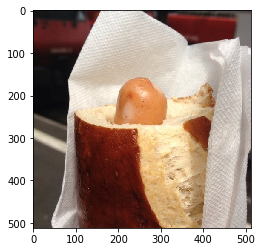

In [63]:
plt.imshow(img[:,:,::-1])

# Workflow

- One vector for each image, and keep its corresponding class. (x,y)
- Create a model 
- Measure performance on the test set



We will use HOG descriptors (histogram of oriented gradients)

In [64]:
win_size = (20,20)
block_size = (10,10)
block_stride = (5,5)
cell_size = (5,5)
nbins = 9
descriptor = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins)
hog_vec_img = descriptor.compute(img)

In [65]:
hog_vec_img # Representation of the image as a vector

array([[0.03233429],
       [0.01420227],
       [0.04249846],
       ...,
       [0.35808915],
       [0.00202639],
       [0.        ]], dtype=float32)

C:\Users\HP\Anaconda3\envs\opencv\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


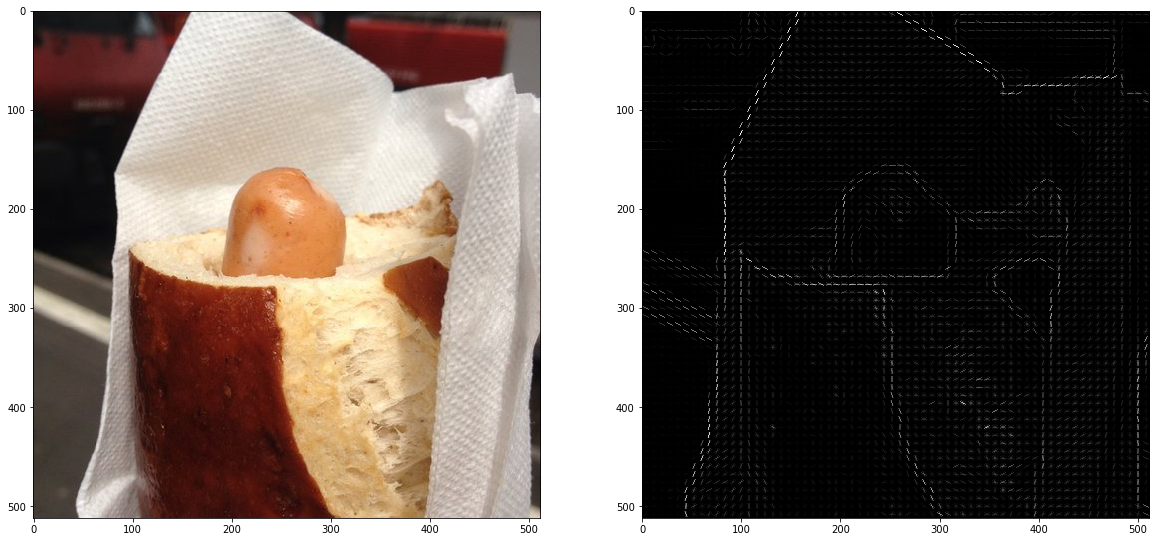

In [66]:
### WITH SCIKIT-IMAGE
# !pip install scikit-image
from skimage.feature import hog
fd, hog_image = hog(img, visualize = True)
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(img[:,:,::-1])
plt.subplot(122)
plt.imshow(hog_image, cmap="gray")

In [67]:
def calc_hog(img):
    img = cv2.resize(img,(50,50))
    win_size = (20,20)
    block_size = (10,10)
    block_stride = (5,5)
    cell_size = (5,5)
    nbins = 9
    descriptor = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins)
    hog_vec_img = descriptor.compute(img)
    return hog_vec_img.T

### 1. Create an array of (n_train_images, n_hog_features) using the `train` folder. 

We also create, for each image, an array that has the class it belongs to.
- 1 = hot dog
- 0 = Not hot dog

In [89]:
import glob
train_hd_files = glob.glob("../opencv-np-workshop/data/hotdog/train/hot_dog/*")
train_nhd_files = glob.glob("../opencv-np-workshop/data/hotdog/train/not_hot_dog/*")

In [69]:
train_size = len(train_hd_files)+len(train_nhd_files)

In [70]:
hog_features = calc_hog(img)

In [71]:
hog_features.shape

(1, 15876)

In [72]:
n_features = hog_features.shape[1]

In [73]:
X_train = np.zeros((train_size, n_features))
y_train = np.zeros((train_size, 1))

In [74]:
for i, f in enumerate(train_hd_files):
    img = cv2.imread(f)
    feat = calc_hog(img)
    X_train[i,:] = feat
    y_train[i] = 1

In [75]:
for i, f in enumerate(train_nhd_files):
    img = cv2.imread(f)
    feat = calc_hog(img)
    X_train[i+len(train_hd_files),:] = feat

In [76]:
# Conver to np.float32/np.int32 before going to OpenCV
X_train = np.ndarray.astype(X_train, dtype=np.float32)
y_train = np.ndarray.astype(y_train, dtype=np.int32)

### 2. Train our model: SVM

- SVM = support vector machines.
- We want a decision boundary/hyperplane in the descriptor space. There is more than one of such decision boundaries.
- SVM chooses one that achieves maximum separation distance between two classes.

In [77]:
svm = cv2.ml.SVM_create()

### ADD CUSTOM VALUES FOR HYPERPARAMETERS
svm.setC(1) # Set a hyperparameter C=1 (penalization term)
svm.setGamma(2)
svm.setKernel(cv2.ml.SVM_RBF)
svm.setType(cv2.ml.SVM_C_SVC)

In [78]:
svm.train(X_train, cv2.ml.ROW_SAMPLE, y_train)

True

#### Measure train error

In [79]:
_, y_pred = svm.predict(X_train)

In [80]:
error = (y_train != y_pred).mean() # Average training error

#### EXERCISE: Measure test error

In [81]:
test = cv2.imread("../opencv-np-workshop/data/hotdog/test/hot_dog/514482.jpg")

In [82]:
test_hog = calc_hog(test)

In [83]:
test_hog.shape

(1, 15876)

In [84]:
_, label = svm.predict(test_hog)

In [85]:
label

array([[0.]], dtype=float32)

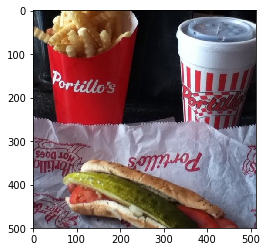

In [86]:
plt.imshow(test[:,:,::-1])